In [3]:
%cd /home/jupyter-marco/perturbed-minds/perturbed-minds/

/home/jupyter-marco/perturbed-minds/perturbed-minds


In [103]:
import matplotlib.pyplot as plt

from processingpipeline.pipeline import processing

from utils.dataset import MicroscopyDataset

dataset = MicroscopyDataset(non_recognisable=None, raw=True,
                                camera_parameter_set=1)

pipelines_reducted = ['bilinear_sharpening_filter_median_denoising',
                   'bilinear_sharpening_filter_gaussian_denoising',
#                    'bilinear_sharpening_filter_fft_denoising',
                   'bilinear_unsharp_masking_median_denoising',
                   'bilinear_unsharp_masking_gaussian_denoising',
#                    'bilinear_unsharp_masking_fft_denoising',
                   'malvar2004_sharpening_filter_median_denoising',
#                    'malvar2004_sharpening_filter_gaussian_denoising',
#                    'malvar2004_sharpening_filter_fft_denoising',
                   'malvar2004_unsharp_masking_median_denoising',
                   'malvar2004_unsharp_masking_gaussian_denoising',
#                    'malvar2004_unsharp_masking_fft_denoising',
                   'menon2007_sharpening_filter_median_denoising',
#                    'menon2007_sharpening_filter_gaussian_denoising',
#                    'menon2007_sharpening_filter_fft_denoising',
                   'menon2007_unsharp_masking_median_denoising',
                   'menon2007_unsharp_masking_gaussian_denoising',]
#                    'menon2007_unsharp_masking_fft_denoising']

pipelines = ['bilinear_sharpening_filter_median_denoising',
                   'bilinear_sharpening_filter_gaussian_denoising',
                   'bilinear_sharpening_filter_fft_denoising',
                   'bilinear_unsharp_masking_median_denoising',
                   'bilinear_unsharp_masking_gaussian_denoising',
                   'bilinear_unsharp_masking_fft_denoising',
                   'malvar2004_sharpening_filter_median_denoising',
                   'malvar2004_sharpening_filter_gaussian_denoising',
                   'malvar2004_sharpening_filter_fft_denoising',
                   'malvar2004_unsharp_masking_median_denoising',
                   'malvar2004_unsharp_masking_gaussian_denoising',
                   'malvar2004_unsharp_masking_fft_denoising',
                   'menon2007_sharpening_filter_median_denoising',
                   'menon2007_sharpening_filter_gaussian_denoising',
                   'menon2007_sharpening_filter_fft_denoising',
                   'menon2007_unsharp_masking_median_denoising',
                   'menon2007_unsharp_masking_gaussian_denoising',
                   'menon2007_unsharp_masking_fft_denoising']


In [104]:
img_N = 0

img = dataset[img_N][0]
black_level,white_balance,colour_matrix = dataset.camera_parameters

parameters_name = ["sharp_radius", "sharp_amount", "gaussian_sigma", "fft_fraction", 
                   "weight_chambolle", "weight_bregman", "sigma_bilateral", "gamma", "bits"]
parameters = [1.0,1.0,3,0.5,0.47,0.01,100,0.6,2.2,16]

pips=[]
pips_reducted=[]

for pipeline in pipelines:
    elements = pipeline.split("_")
    pip = processing(img, black_level, white_balance, colour_matrix, debayer=elements[0], pattern='RGGB', 
                   sharpening=elements[1]+"_"+elements[2], sharp_radius=parameters[0], sharp_amount=parameters[1], 
                   denoising=elements[3]+"_"+elements[4], median_kernel_size=parameters[2],
                   gaussian_sigma=parameters[3], fft_fraction=parameters[4], weight_chambolle=parameters[5], 
                   weight_bregman=parameters[6], sigma_bilateral=parameters[7], gamma=parameters[8], bits=parameters[9])
    pips.append(pip)
    
for pipeline in pipelines_reducted:
    elements = pipeline.split("_")
    pip = processing(img, black_level, white_balance, colour_matrix, debayer=elements[0], pattern='RGGB', 
                   sharpening=elements[1]+"_"+elements[2], sharp_radius=parameters[0], sharp_amount=parameters[1], 
                   denoising=elements[3]+"_"+elements[4], median_kernel_size=parameters[2],
                   gaussian_sigma=parameters[3], fft_fraction=parameters[4], weight_chambolle=parameters[5], 
                   weight_bregman=parameters[6], sigma_bilateral=parameters[7], gamma=parameters[8], bits=parameters[9])
    pips_reducted.append(pip)

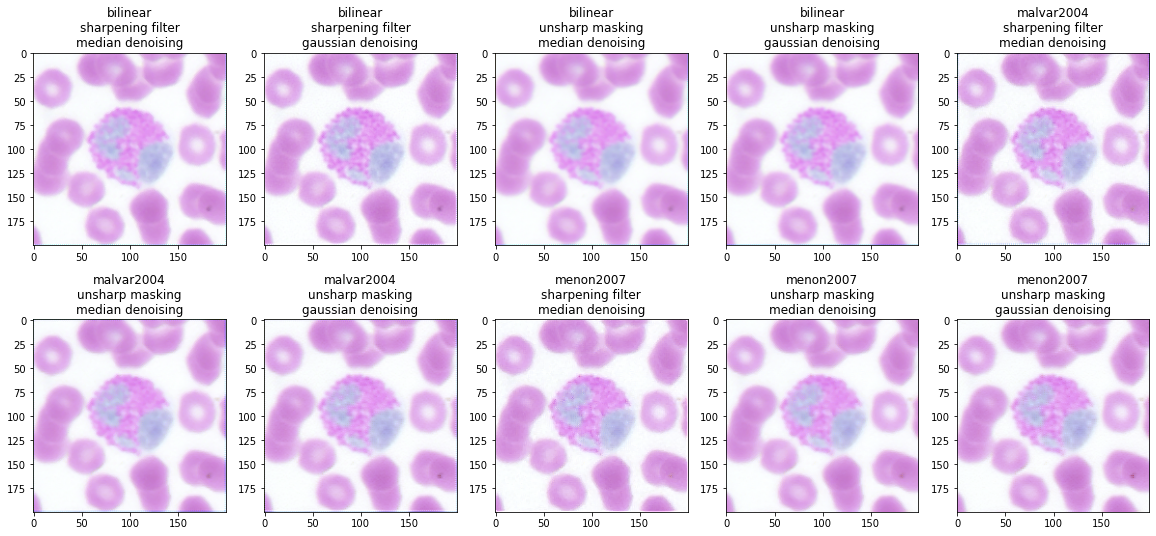

In [127]:
# PLOT PIPELINES SELECTION
plt.figure(figsize=[20,9])
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(pips_reducted[i])
    name=pipelines_reducted[i].split("_")
    plt.title(f"{name[0]}\n{name[1]} {name[2]}\n{name[3]} {name[4]}")
    
plt.savefig(f"results/pipelines_reducted.png")

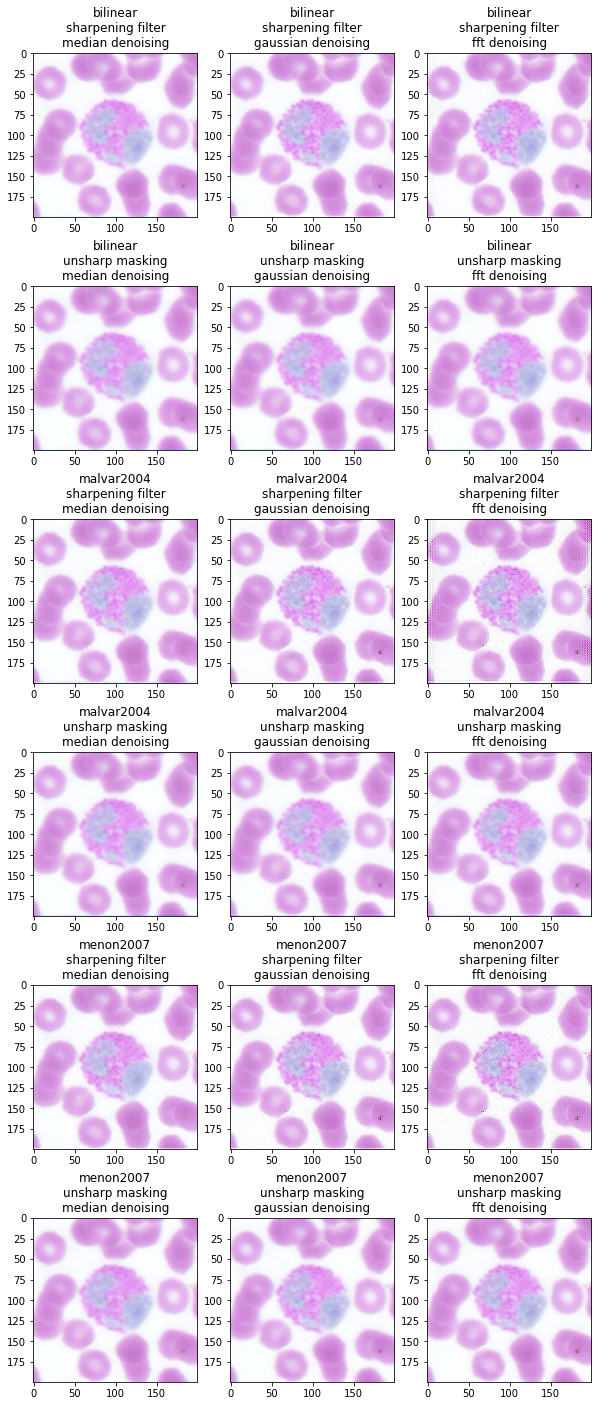

In [122]:
# PLOT ALL PIPELINES
plt.figure(figsize=[10,25])
for i in range(18):
    plt.subplot(6,3,i+1)
    plt.imshow(pips[i])
    name=pipelines[i].split("_")
    plt.title(f"{name[0]}\n{name[1]} {name[2]}\n{name[3]} {name[4]}")
    
plt.savefig(f"results/all_pipelines.png")

# # PLOT MALVAR
# plt.figure(figsize=[15,10])
# for i in range(6,12):
#     plt.subplot(2,3,i+1-6)
#     plt.imshow(pips[i])
#     plt.title(pipelines[i])
    
# plt.savefig(f"results/malvar.png")

# # PLOT MENON
# plt.figure(figsize=[15,10])
# for i in range(12,18):
#     plt.subplot(2,3,i+1-12)
#     plt.imshow(pips[i])
#     plt.title(pipelines[i])
    
# plt.savefig(f"results/menon.png")